# MgCl2 Titrationen mit 116 mM K(I) background

In [1]:
import b_lab_functions as blab
import main as main
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns
from scipy import optimize
import matplotlib.gridspec as gridspec
import os

In [2]:
def rgb_to_hex(rgb):# hier kann ich direkt die Farben aus Inkscape eintragen und bekommen ienen colorcode mit #123456 raus
    """
    Convert an RGB color value to a hex color code.

    :param rgb: A tuple of red, green, and blue (each in the range 0-255)
    :return: A string representing the hex color code
    """
    r, g, b = rgb
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [3]:
# farbskala definieren fuer 3D Plots
my_gradient_blue = LinearSegmentedColormap.from_list('my_gradient_blue', (
    # Edit this gradient at https://eltos.github.io/gradient/#2B2D6F-1D3E6A-376993-4480A1-5C94AC
    (0.000, (0.169, 0.176, 0.435)),
    (0.250, (0.329, 0.443, 0.596)),
    (0.500, (0.510, 0.616, 0.706)),
    (0.750, (0.635, 0.780, 0.859)),
    (1.000, (0.800, 0.894, 0.937))))

In [4]:
data = pd.read_csv("2024-05-23_MgCl2_K.csv")

In [5]:
#DAS HIER IST DIE LSG
data['c (mM)'] = data['Name'].str.split(' ').str[0]

data['c (mM)'] = data['c (mM)'].astype(float)
data

,Temperature (C),Abs,Measurement,Name,norm_Abs,dabs_dt,c (mM)
0,90.000000,0.353807,1,5 mM MgCl2_260.00nm_90.0-21.0C,0.929898,-0.032532,5.0
1,89.000000,0.355598,1,5 mM MgCl2_260.00nm_90.0-21.0C,0.962430,-0.028981,5.0
2,88.000000,0.356998,1,5 mM MgCl2_260.00nm_90.0-21.0C,0.987859,-0.018785,5.0
3,87.000000,0.357666,1,5 mM MgCl2_260.00nm_90.0-21.0C,1.000000,-0.004808,5.0
4,86.000000,0.357527,1,5 mM MgCl2_260.00nm_90.0-21.0C,0.997475,0.002387,5.0
...,...,...,...,...,...,...,...
2795,86.000000,0.332231,16,25 mM MgCl2_260.00nm_21.0-90.0C_R1,0.932006,0.017385,25.0
2796,87.000000,0.333238,16,25 mM MgCl2_260.00nm_21.0-90.0C_R1,0.949916,0.017642,25.0
2797,88.000000,0.334215,16,25 mM MgCl2_260.00nm_21.0-90.0C_R1,0.967290,0.017985,25.0
2798,89.000000,0.335260,16,25 mM MgCl2_260.00nm_21.0-90.0C_R1,0.985887,0.019517,25.0


In [6]:
result = data.loc[data['c (mM)'] == 0.1]

print(result)

     Temperature (C)       Abs  Measurement  \
560        90.000000  0.369645            9   
561        89.000000  0.371213            9   
562        88.000000  0.372529            9   
563        87.000000  0.372906            9   
564        86.000000  0.372837            9   
..               ...       ...          ...   
835        86.000000  0.394311           12   
836        87.000000  0.394981           12   
837        88.000000  0.395582           12   
838        89.000000  0.396061           12   
839        89.699997  0.396529           12   

                                    Name  norm_Abs   dabs_dt  c (mM)  
560     0.1 mM MgCl2_260.00nm_90.0-21.0C  0.943284 -0.026099     0.1  
561     0.1 mM MgCl2_260.00nm_90.0-21.0C  0.969383 -0.024009     0.1  
562     0.1 mM MgCl2_260.00nm_90.0-21.0C  0.991302 -0.014102     0.1  
563     0.1 mM MgCl2_260.00nm_90.0-21.0C  0.997588 -0.002564     0.1  
564     0.1 mM MgCl2_260.00nm_90.0-21.0C  0.996431 -0.001206     0.1  
..       

In [7]:
data['log_conc'] = np.log10(data['c (mM)'])
data = data[data['c (mM)'] != 0]

C:\Users\schuman2\Anaconda3\envs\Physik_Praktikum\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


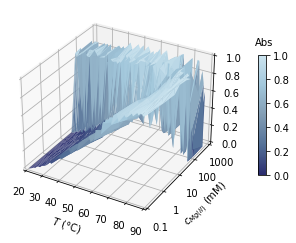

In [8]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data['Temperature (C)'], data['log_conc'], data['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0, vmax=1)
yticks = [-1,0, 1, 2, 3]
ylabel = ['0.1','1', '10', '100', '1000']
ax.set_yticks(yticks, labels = ylabel)
ax.set_ylim([-1,3])
ax.set_xlim([20,90])
ax.set_zlim([0,1])
plt.xlabel('$T$ (°C)')
plt.ylabel('$c_{Mg(II)}$ (mM)')
#plt.savefig(".png", dpi=600, bbox_inches="tight")
plt.show()

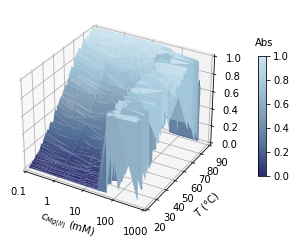

In [9]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data['log_conc'], data['Temperature (C)'], data['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0.0, vmax=1.0)
xticks = [-1, 0, 1, 2, 3]
xlabel = ['0.1', '1', '10', '100', '1000']
ax.set_xticks(xticks, labels = xlabel)
ax.set_xlim([-1,3])
ax.set_ylim([20,90])
ax.set_zlim([0.0,1.0])
plt.ylabel('$T$ (°C)')
plt.xlabel('$c_{Mg(II)}$ (mM)')
plt.show()

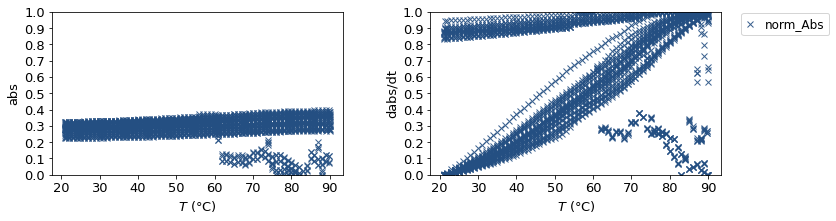

In [10]:
#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), sharex=False, sharey=False, squeeze=False)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), sharex=False, sharey=False, squeeze=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
temps = 8
palette = plt.get_cmap('Accent',temps)
# draw plot for the two plots
ax[0,0].scatter(data["Temperature (C)"], data["Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='abs')

ax[0,1].scatter(data["Temperature (C)"], data["norm_Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='norm_Abs')

ax[0,0].set_ylim([0.0,1])
ax[0,1].set_ylim([0.0,1.0])
ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[0,0].locator_params(axis="both", nbins=10)
ax[0,1].locator_params(axis="both", nbins=10)
ax[0,0].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,1].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,0].set_ylabel("abs", fontsize = 13)
ax[0,1].set_ylabel("dabs/dt", fontsize = 13)
plt.legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper right', bbox_to_anchor=(1.39, 1.03))
#plt.savefig(".png", dpi=600, bbox_inches="tight")
#plt.savefig(".svg", dpi=600, bbox_inches="tight")
plt.show()

## Wiederholung der Messungen

In [11]:
data_II = pd.read_csv("2024-05-24_MgCl2_K_II.csv")

data_II['c (mM)'] = data_II['Name'].str.split(' ').str[0]
data_II['c (mM)'] = data_II['c (mM)'].astype(float)
data_II

,Temperature (C),Abs,Measurement,Name,norm_Abs,dabs_dt,c (mM)
0,90.000000,0.291221,1,10 mM MgCl2_260.00nm_90.0-21.0C,1.000000,0.016799,10.0
1,89.000000,0.290424,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.983201,0.009320,10.0
2,88.000000,0.290337,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.981360,0.005365,10.0
3,87.000000,0.289915,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.972471,0.009252,10.0
4,86.000000,0.289459,1,10 mM MgCl2_260.00nm_90.0-21.0C,0.962857,0.007453,10.0
...,...,...,...,...,...,...,...
2235,86.000000,0.343521,16,10 mM MgCl2_260.00nm_21.0-90.0C_R1,0.937809,0.017680,10.0
2236,87.000000,0.344576,16,10 mM MgCl2_260.00nm_21.0-90.0C_R1,0.955342,0.017679,10.0
2237,88.000000,0.345648,16,10 mM MgCl2_260.00nm_21.0-90.0C_R1,0.973166,0.016744,10.0
2238,89.000000,0.346590,16,10 mM MgCl2_260.00nm_21.0-90.0C_R1,0.988831,0.015836,10.0


In [12]:
result_II = data_II.loc[data_II['c (mM)'] == 0.1]
print(result_II)

      Temperature (C)       Abs  Measurement  \
840         90.000000  0.343009           13   
841         89.000000  0.342385           13   
842         88.000000  0.342366           13   
843         87.000000  0.342407           13   
844         86.000000  0.342478           13   
...               ...       ...          ...   
1115        86.000000  0.361420           16   
1116        87.000000  0.362097           16   
1117        88.000000  0.362856           16   
1118        89.000000  0.363640           16   
1119        89.699997  0.364150           16   

                                     Name  norm_Abs   dabs_dt  c (mM)  
840      0.1 mM MgCl2_260.00nm_90.0-21.0C  1.000000  0.011581     0.1  
841      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.988419  0.005971     0.1  
842      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.988057 -0.000201     0.1  
843      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.988820 -0.001044     0.1  
844      0.1 mM MgCl2_260.00nm_90.0-21.0C  0.990145 -0.000103  

In [13]:
data_II['log_conc'] = np.log10(data_II['c (mM)'])
data_II = data_II[data_II['c (mM)'] != 0]

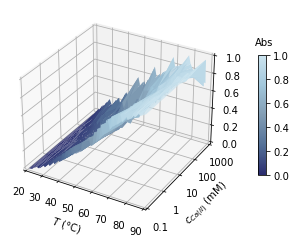

In [14]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_II['Temperature (C)'], data_II['log_conc'], data_II['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0, vmax=1)
yticks = [-1,0, 1, 2, 3]
ylabel = ['0.1','1', '10', '100', '1000']
ax.set_yticks(yticks, labels = ylabel)
ax.set_ylim([-1,3])
ax.set_xlim([20,90])
ax.set_zlim([0,1])
plt.xlabel('$T$ (°C)')
plt.ylabel('$c_{Ca(II)}$ (mM)')
#plt.savefig(".png", dpi=600, bbox_inches="tight")
plt.show()

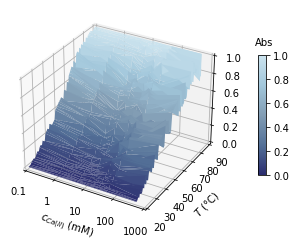

In [15]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_II['log_conc'], data_II['Temperature (C)'], data_II['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0.0, vmax=1.0)
xticks = [-1, 0, 1, 2, 3]
xlabel = ['0.1', '1', '10', '100', '1000']
ax.set_xticks(xticks, labels = xlabel)
ax.set_xlim([-1,3])
ax.set_ylim([20,90])
ax.set_zlim([0.0,1.0])
plt.ylabel('$T$ (°C)')
plt.xlabel('$c_{Ca(II)}$ (mM)')
plt.show()

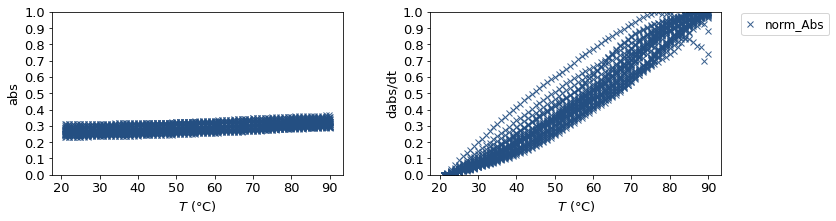

In [16]:
#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), sharex=False, sharey=False, squeeze=False)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), sharex=False, sharey=False, squeeze=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
temps = 8
palette = plt.get_cmap('Accent',temps)
# draw plot for the two plots
ax[0,0].scatter(data_II["Temperature (C)"], data_II["Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='abs')

ax[0,1].scatter(data_II["Temperature (C)"], data_II["norm_Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='norm_Abs')

ax[0,0].set_ylim([0.0,1])
ax[0,1].set_ylim([0.0,1.0])
ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[0,0].locator_params(axis="both", nbins=10)
ax[0,1].locator_params(axis="both", nbins=10)
ax[0,0].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,1].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,0].set_ylabel("abs", fontsize = 13)
ax[0,1].set_ylabel("dabs/dt", fontsize = 13)
plt.legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper right', bbox_to_anchor=(1.39, 1.03))
#plt.savefig(".png", dpi=600, bbox_inches="tight")
#plt.savefig(".svg", dpi=600, bbox_inches="tight")
plt.show()